# Support Vector Machine

## 1 Linear Regression VS SVR

You will see the difference between linear regression and SVM regressor

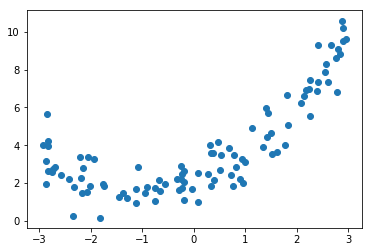

In [38]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y)
plt.show()

Standardize data and train a regression model

In [39]:
### Your code start here ###
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
# search in the sklearn documentation en use 'fit_transform'
X_std = std.fit_transform(X)

lin_reg = LinearRegression()

lin_reg.fit(X, y)

### Your code end here ###

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

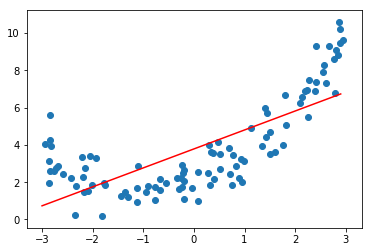

In [40]:
x_lr = np.array(np.arange(-3, 3, 0.1)).reshape(60, 1)
y_lr = lin_reg.predict(x_lr)
plt.plot(x_lr, y_lr, color='red')

plt.scatter(X,y)
plt.show()

Standardize data and train a Support Vector Machine regressor. Help you with the sklearn documentation

In [41]:
### Your code start here ###
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
# search in the sklearn documentation en use 'fit_transform'
X_std = std.fit_transform(X)

svm = SVR()

svm.fit(X_std, y)

### Your code end here ###

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

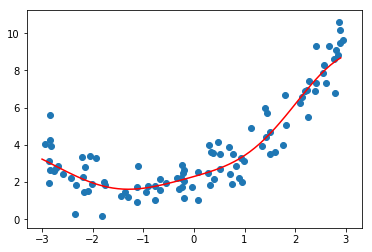

In [43]:
x_lr = np.array(np.arange(-3, 3, 0.1)).reshape(60, 1)
x_lr_std = std.transform(x_lr)
y_lr = svm.predict(x_lr_std)
plt.plot(x_lr, y_lr, color='red')

plt.scatter(X,y)
plt.show()

As you can see SVM can better fit data than linear regression.

## 2 Logistic Regression VS SVC

You will see the difference between and SVM classifier

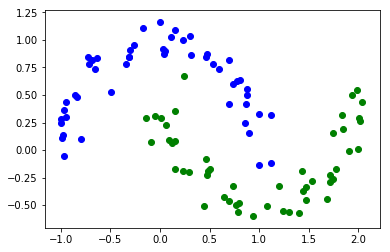

In [44]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1)

plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='green')
plt.show()

Standardize your data en train a logsitic regression.

In [45]:
### Your code start here ###
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
# search in the sklearn documentation en use 'fit_transform'
X_std = std.fit_transform(X)

log_reg = LogisticRegression(solver='lbfgs')

log_reg.fit(X, y)

### Your code end here ###

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

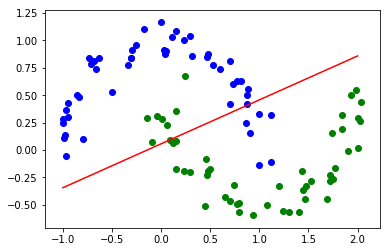

In [46]:
W0 = log_reg.intercept_
W = log_reg.coef_

rl_x = np.array(range(-1, 3))
rl_y = (-1/W[0, 1]) * (rl_x * W[0, 0] + W0[0])

plt.plot(rl_x, rl_y, c='red')

plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='green')
plt.show()

Standardize data and train a Support Vector Machine classifier Help you with the sklearn documentation

In [47]:
### Your code start here ###
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
# search in the sklearn documentation en use 'fit_transform'
X_std = std.fit_transform(X)

svm = SVC(kernel='rbf', gamma='scale')

svm.fit(X_std, y)

### Your code end here ###

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

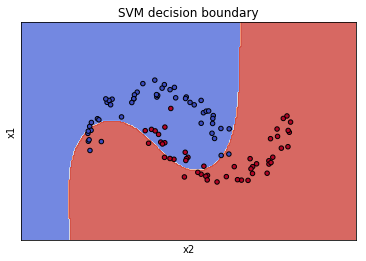

In [48]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
  
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
  
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x2')
plt.ylabel('x1')
plt.xticks(())
plt.yticks(())
plt.title('SVM decision boundary')
plt.show()

## 3 C hyperpramater in SVM regressor

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(123)

To work we need data, run this piece of code and upload the dataset : univariate_regression.txt

In [16]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google.colab'

In [18]:
svm_data_1 = np.genfromtxt('svm_data_1.txt', delimiter=',')

In [19]:
# We construct the X dataset 
X = svm_data_1[:, :2]

# We construct the Y dataset
y = svm_data_1[:, 2]

First use what you saw on the Lecture 2 to standardize your data using sklearn.

In [20]:
### Your code start here ###

std = StandardScaler()
# search in the sklearn documentation en use 'fit_transform'
X_std = std.fit_transform(X)

### Your code end here ###

We will begin by with a 2D example dataset which can be separated by a linear boundary. In this dataset, the positions of the positive examples (indicated by a triangle in green) and the negative examples (indicated bya circle in blue) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example a triangle in green on the far left at about (0.1, 4.1). As part of this exercise, you will also see how this outlier affects the SVM decision boundary.

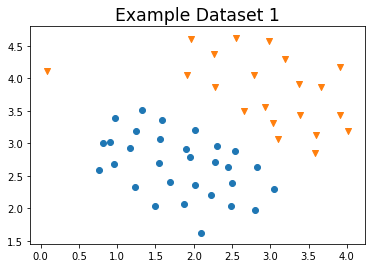

In [21]:
plt.scatter(X[y==0, 0], X[y==0, 1], label='Admitted')
plt.scatter(X[y==1, 0], X[y==1, 1], label='Not admitted', marker='v')
plt.title('Example Dataset 1', size='xx-large')

plt.show()

In this part of the exercise, you will try using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$ , where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

New cost function :

$$J(W)=C[\sum^{m}_{i}y^{(i)}cost_1(W^Tx{(i)})+(1-y^{(i)})cost_0(W^Tx^{(i)})]+\frac{1}{2}\sum^m_{i=1}w^2_j$$


$$C=\frac{1}{\lambda}$$

Try different value of C and 

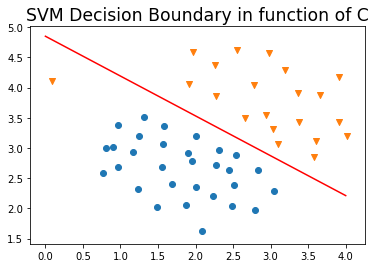

In [22]:
from sklearn.svm import SVC

### Your code start here ###
svc = SVC(C=1, kernel='linear', gamma='scale')
### Your code end here ###

svc.fit(X, y)

W0 = svc.intercept_
W = svc.coef_

rl_x = np.array(range(0, 5))
rl_y = (-1/W[0, 1]) * (rl_x * W[0, 0] + W0[0])

plt.plot(rl_x, rl_y, c='red')

plt.scatter(X[y==0, 0], X[y==0, 1], label='Admitted')
plt.scatter(X[y==1, 0], X[y==1, 1], label='Not admitted', marker='v')
plt.title('SVM Decision Boundary in function of C', size='xx-large')

plt.show()

What do you think about the impact of C in this example ?

## 4 impact of C in SVM classifier

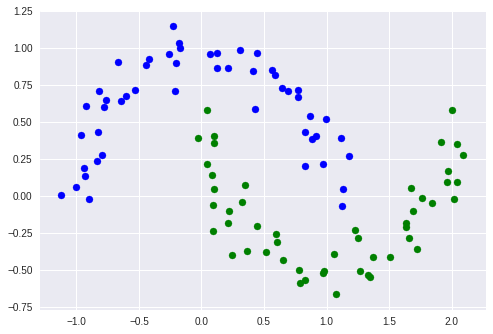

In [232]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1)

plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='green')
plt.show()

Play with C parameter.

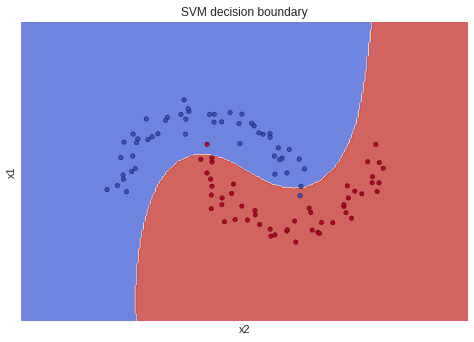

In [252]:
std = StandardScaler()
# search in the sklearn documentation en use 'fit_transform'
X_std = std.fit_transform(X)

svm = SVC(C=1, kernel='rbf', gamma='scale')

svm.fit(X, y)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
  
plot_contours(plt, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x2')
plt.ylabel('x1')
plt.xticks(())
plt.yticks(())
plt.title('SVM decision boundary')
plt.show()

What do you think about C when it comes large ? And whne it comes small ?

Test different kernel (sigmoid, poly, linear, etc...)